In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append('../../')

import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import capacity.geometry_correlations as new
import capacity.mean_field_cap as PRX
import capacity.basic as basic

from capacity.utils import *
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

rng = np.random.default_rng()

In [3]:
path = '/mnt/home/cchou/ceph/Capstone/Dataframes/epoch1.pkl'
data = pd.read_pickle(path)

In [4]:
idx = pd.IndexSlice

In [5]:
XtotT = data.loc[idx[1,'X_projected']]

In [6]:
XtotT = zscore_XtotT(XtotT)

In [10]:
P = len(XtotT)
N, M = XtotT[0].shape
M_small = 50

In [11]:
XtotT_small = [XtotT[i][:,rng.choice([j for j in range(M)],M_small)] for i in range(P)]

In [62]:
np.linalg.matrix_rank(XtotT[i])

500

In [64]:
i = 1
np.linalg.matrix_rank(XtotT[i][:,rng.choice([j for j in range(M)],M_small,replace=False)])

50

In [26]:
np.linalg.matrix_rank(XtotT_small)

array([48, 47, 49, 46, 47, 49, 46, 48, 49, 46, 46, 47, 49, 48, 49, 48, 46,
       47, 47, 48, 46, 48, 50, 47, 48, 47, 46, 46, 47, 48, 50, 47, 47, 48,
       48, 50, 48, 49, 45, 46, 47, 48, 47, 44, 48, 47, 47, 48, 48, 46])

In [74]:
df_result = pd.DataFrame()

In [75]:
folder_path = '/mnt/home/cchou/ceph/Capstone/Project_A/result'
files_in_folder = os.listdir(folder_path)
for epoch in range(1,6):    
    file_list = [file for file in files_in_folder if f'{epoch}_' in file]
    for file in file_list:
        path = f'/mnt/home/cchou/ceph/Capstone/Project_A/result/'+file
        df_new = pd.read_pickle(path)
        df_result = pd.concat([df_result, df_new])

In [78]:
df_mean = df_result.groupby(['epoch','layer']).mean()

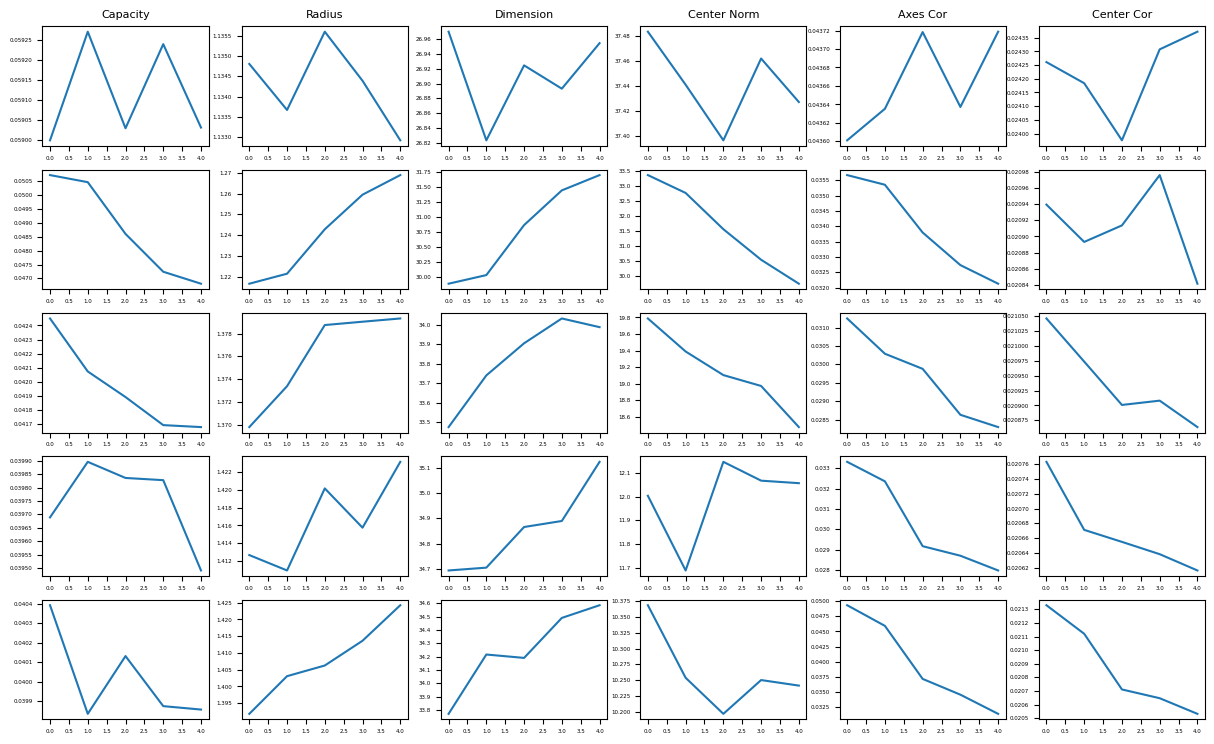

In [107]:
num_layer = 5
num_epoch = 5
key_list = ['alpha_cor_mf', 'R_M_cor', 'D_M_cor', 'ell_M_cor', 'cor_axes', 'cor_center']
key_name_list = ['Capacity', 'Radius', 'Dimension', 'Center Norm', 'Axes Cor', 'Center Cor']
fig, axs = plt.subplots(num_layer,len(key_list))
fig.set_figwidth(15)
fig.set_figheight(9)
for i, key in enumerate(key_list):
    for i_layer in range(num_layer):
        x = [df_mean.loc[epoch,i_layer][key] for epoch in range(1,num_epoch+1)]
        axs[i_layer][i].plot(x)
        axs[i_layer][i].tick_params(axis='both', labelsize=4)
        axs[0][i].set_title(key_name_list[i], fontsize=8)